# XGBoost Modelling

In [1]:
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate

import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import pandas as pd
import numpy as np
from sklearn import set_config; set_config(display='diagram')

pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
from hcdr.modeling.preproc import preproc_pipeline
from hcdr.data.merged_data import merge_dfs

In [4]:
#%%time
df_merged = merge_dfs(df_app="application_train", verbose=True)
df_merged = df_merged.replace(to_replace=np.inf,value=np.nan).replace(to_replace=-np.inf,value=np.nan)

Aggregating non-application dataframes...
application_train:       122 --> 72. Dropped 50 columns
application_test:       121 --> 71. Dropped 50 columns
previous_application:       37 --> 26. Dropped 11 columns
Loading credit card balance data table...
23 --> 23. Dropped 0 columns
optimized size by 26.0 % | 0.0078625 GB
Loading 'bureau' AND 'bureau_balance' data tables...
Running get_bureau_final function...
Running get_bureau_balance_final function...
optimized size by 65.99999999999999 % | 0.002092907 GB
Loading isntallments payments data table...
8 --> 8. Dropped 0 columns
optimized size by 19.999999999999996 % | 0.002400128 GB
Loading POS_CASH_balance data table...
8 --> 8. Dropped 0 columns
optimized size by 32.99999999999999 % | 0.005126624 GB
application_train:       72 --> 72. Dropped 0 columns
application_test:       71 --> 71. Dropped 0 columns
previous_application:       26 --> 26. Dropped 0 columns
credit_card_balance:       23 --> 16. Dropped 7 columns
bureau:       493 --

In [5]:
df_merged_path ="../raw_data/df_merged.pkl"
#df_merged.to_pickle(df_merged_path)

In [6]:
#df_merged = pd.read_pickle(df_merged_path)

In [7]:
X = df_merged.drop(columns=["SK_ID_CURR", "TARGET"]).iloc[:1000]
y = df_merged["TARGET"].iloc[:1000]

del df_merged

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

del X
del y

In [9]:
preproc = preproc_pipeline(scaler_type=None)

Running preprocessor...
scaler_type=None


In [10]:
X_train_transformed = preproc.fit_transform(X_train)
X_val_transformed = preproc.transform(X_val)

In [11]:
print(X_train_transformed.shape, X_val_transformed.shape)

(700, 661) (300, 661)


In [12]:
initial_xgb = XGBClassifier(n_jobs=-1)

initial_xgb.fit(
    X_train_transformed, y_train,
    eval_metric="auc",
    # evaluate loss at each iteration
    eval_set=[(X_val_transformed, y_val)], 
    # stop iterating when eval loss increases 5 times in a row
    early_stopping_rounds=10, 
    
) 

[0]	validation_0-auc:0.71883
[1]	validation_0-auc:0.73380
[2]	validation_0-auc:0.80129
[3]	validation_0-auc:0.81556
[4]	validation_0-auc:0.77941
[5]	validation_0-auc:0.79778
[6]	validation_0-auc:0.79345
[7]	validation_0-auc:0.78737
[8]	validation_0-auc:0.78901
[9]	validation_0-auc:0.78748
[10]	validation_0-auc:0.78491
[11]	validation_0-auc:0.79333
[12]	validation_0-auc:0.79205


/Users/maximilianglasmacher/.pyenv/versions/3.8.6/envs/home-credit-default-risk/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [13]:
y_pred = initial_xgb.predict_proba(X_val_transformed)

In [14]:
y_pred

array([[0.8568001 , 0.1431999 ],
       [0.8568001 , 0.1431999 ],
       [0.819942  , 0.18005803],
       [0.83394295, 0.16605705],
       [0.76447755, 0.23552243],
       [0.8568001 , 0.1431999 ],
       [0.7742279 , 0.22577207],
       [0.803209  , 0.19679101],
       [0.8568001 , 0.1431999 ],
       [0.8568001 , 0.1431999 ],
       [0.78813744, 0.2118626 ],
       [0.8526512 , 0.14734884],
       [0.7135043 , 0.2864957 ],
       [0.83455503, 0.16544499],
       [0.8532064 , 0.14679359],
       [0.8512719 , 0.14872806],
       [0.81227225, 0.18772773],
       [0.8526512 , 0.14734884],
       [0.81972754, 0.18027245],
       [0.8526512 , 0.14734884],
       [0.8568001 , 0.1431999 ],
       [0.8568001 , 0.1431999 ],
       [0.756774  , 0.243226  ],
       [0.803209  , 0.19679101],
       [0.8526512 , 0.14734884],
       [0.7040026 , 0.2959974 ],
       [0.83545977, 0.16454022],
       [0.8568001 , 0.1431999 ],
       [0.8292719 , 0.17072807],
       [0.8313232 , 0.16867681],
       [0.

In [15]:
y_pred = y_pred[:, 1]

In [16]:
print(y_val.shape, y_pred.shape)

(300,) (300,)


In [17]:
roc_auc = roc_auc_score(y_val, y_pred)

In [18]:
roc_auc

0.8155555555555556

In [19]:
(y_pred>0.5).sum()

2

Text(0.5, 1.0, 'Precision-Recall Curve')

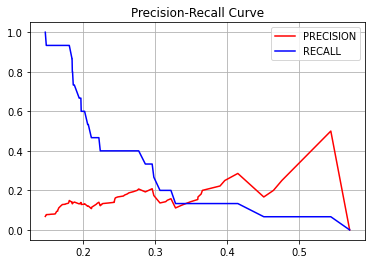

In [20]:
# Plot Precision-Recall curve using sklearn.
from sklearn.metrics import precision_recall_curve
precision, recall, treshold = precision_recall_curve(y_val, y_pred)
  
# Plot the output.
plt.plot(treshold, precision[:-1], c ='r', label ='PRECISION')
plt.plot(treshold, recall[:-1], c ='b', label ='RECALL')
plt.grid()
plt.legend()
plt.title('Precision-Recall Curve')

## XGBoost Random Search

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from datetime import datetime


In [22]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [23]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [24]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

In [25]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train_transformed, y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None)
random_search.fit(X_train_transformed, y_train)
timer(start_time)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/maximilianglasmacher/.pyenv/versions/3.8.6/envs/home-credit-default-risk/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:54:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:54:12] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 28.14 seconds.


In [29]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best AUC score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_)
print('\n Best hyperparameters:')
print(random_search.best_params_)
#results = pd.DataFrame(random_search.cv_results_)
#results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([5.11627452, 4.83249354, 3.85751677, 3.82041287, 5.19870075]), 'std_fit_time': array([0.04029919, 0.17798233, 0.07840874, 0.05735699, 0.07424441]), 'mean_score_time': array([0.00494607, 0.00670719, 0.00596801, 0.00635759, 0.00608826]), 'std_score_time': array([0.00041091, 0.00089825, 0.0002248 , 0.00060822, 0.0002305 ]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dt